# <p style ="padding: 8px; background: linear-gradient(45deg, #000000, #ad5aff); color : #F8F8FF; font-family: Arial, sans-serif; font-size: 100%; text-align: center; border-radius: 20px; margin-top: 15px; box-shadow: 3px 3px 10px rgba(0,0,0,0.1); border: 2px solid #333;"> <strong> Report Name</strong> </p>


<p style = "text-align: justify; font-family: 'Georgia', serif; font-size: 110%; margin: 20px; border: 2px solid #333; padding: 10px; border-radius: 15px;"> 
In this notebook, I do something
</p>


# <p style ="padding: 8px; background: linear-gradient(45deg, #000000, #ad5aff); color : #F8F8FF; font-family: Arial, sans-serif; font-size: 70%; text-align: center; border-radius: 20px; margin-top: 15px; box-shadow: 3px 3px 10px rgba(0,0,0,0.1); border: 2px solid #333;"> <strong> Table of Contents </strong> </p>


<table style="margin-left: auto; margin-right: auto; width: 85%; border-collapse: collapse; font-family: 'Georgia', serif; font-size: 105%; border: 2px solid #333;">
    <tr>
        <td>No</td>
        <td>Contents</td>
        <td>No</td>
        <td>Contents</td>
    </tr>
    <tr>
        <td>1</td>
        <td><a href="#1"> Problem Background</a></td>
        <td>6</td>
        <td><a href="#6">Investigating Magnitude Diff/Dist Check</a></td>
    </tr>
    <tr>
        <td>2</td>
        <td><a href="#2">Data Description</a></td>
        <td>7</td>
        <td><a href="#7">Investigating Prime Mod 4</a></td>
    </tr>
    <tr>
        <td>3</td>
        <td><a href="#3"> Data Setup</a></td>
        <td>8</td>
        <td><a href="#8">Difference List Analysis</a></td>
    </tr>
    <tr>
        <td>4</td>
        <td><a href="#4"> Diff Plot Examples</a></td>
        <td>9</td>
        <td><a href="#9">Conclusion</a></td>
    </tr>
    <tr>
        <td>5</td>
        <td><a href="#5">Basic EDA</a></td>
        <td></td> 
    </tr>
</table>


$S_p(x) - M_p(x) = E_p(x)$

<a id='1'></a>

# <p style ="padding: 8px; background: linear-gradient(45deg, #000000, #ad5aff); color : #F8F8FF; font-family: Arial, sans-serif; font-size: 70%; text-align: center; border-radius: 20px; margin-top: 15px; box-shadow: 3px 3px 10px rgba(0,0,0,0.1); border: 2px solid #333;"> <strong> Problem Background </strong> </p>

<p style = "text-align: justify; font-family: 'Georgia', serif; font-size: 110%; margin: 20px;"> 

Define $S_p(x) := \sum_{a \leq x} \left( \frac{a}{p} \right)$ to be the character sum of legendre symbols. In other words, the character sum is the partial sum of Legendre symbols. A famous inequality, known as the <em> Polya-Vinogradov </em> Inequality, gives us the following bound:
$$
|S_p(x)| \leq \sqrt{p} \log p.
$$

One way to prove this involves using <em> Polya's Fourier Expansion </em>: 

$$
S_p(x) = \frac{G(p)}{2\pi i} \sum_{i \leq |n| \leq H} \left( \frac{n}{p} \right) \frac{[1 - e(\frac{-nx}{p})]}{n} + O\left(\frac{p \log p}{H}\right) + O(1),
$$

where 
$$
G(p) = \begin{cases}
       \sqrt{p} & \text{ if } p \equiv 1 \ (\textrm{mod } 4) \\
       i \sqrt{p} & \text{ if } p \equiv -1 \ (\textrm{mod } 4).
\end{cases}
$$
</p>

It turns out if you instantiate $H = (\log p)^2$, you get the following:
$$
S_p(x) = C\sqrt{p} \cdot \log \log p + O\left(\frac{p}{\log p}\right). 
$$
Notice that if the error term is smaller than we improve the Polya-Vinogradov Inequality! This is the ambitious ultimate goal, and a starting point was to generate numerics to see what this error term actually looks like, which is what this notebook showcases.

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt


23.559274656913782
17.86951


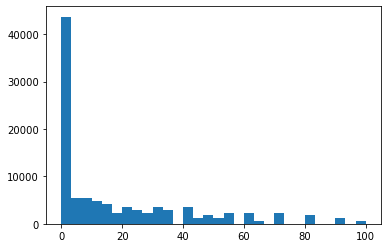

In [24]:

cards = [1,2,3,4,5,6,7,8,9,10,0,0,0]
distribution = [np.prod(random.choices(cards,k=2)) for _ in range(100000)]
plt.hist(distribution, bins=30)
print(np.std(distribution))
print(np.mean(distribution))
